In [1]:
import glob
import pandas as pd
import datetime
import dateutil.parser
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [2]:
# changes the current working directory to the given path...providing this notebook is within the data2022 folder
# the rest of the code below should run just fine without this block

try:
    os.chdir("data2022")
except:
    pass

In [3]:
# reading csv files into single dataframe

extension = 'csv'

try:
    # iterating through each file and merging it into a list
    all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
    
    # joining data from each file into single df
    df = pd.concat([pd.read_csv(filename,index_col=None, header=0, low_memory=False) 
                for filename in all_filenames],axis=0, ignore_index=True)
except:
    print('Invalid File/Unable To Create Dataset')

In [4]:
df_complete = df.copy()
df_complete

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore,...,Planned,Coffee?,StressFul,ImpLevel,DietRating,Multitasking,EfficiencyScore,Podcast,Group Activity,CaffeinatedDrink
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T695,NaN,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052873,L418,NaN,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee
1052874,L418,UD415,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cup of Tea
1052875,ED145,L418,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energy Drink
1052876,L418,UD415,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Caffeinated Drink


In [5]:
# filtering df for standardised columns

original_cols = ['PrimaryActivityCode','SecondaryActivityCode', 'DescriptiveLabel', 'StartDate',
                 'UniBathWeekNo', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore']

df_standard = df_complete[original_cols].copy()

df_standard

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,NaN,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
1052873,L418,NaN,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
1052874,L418,UD415,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
1052875,ED145,L418,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
1052876,L418,UD415,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [6]:
df_standard.describe()  # min value for unibathweekno is 2 and max is 50;
                            # negative durationmins...erronous inputs
                                # enjoymentscore has max of 2 and min of -2 so we dont expect to do any cleaning 
                                    # as the entries appear to be valid

,UniBathWeekNo,DurationMins,EnjoymentScore
count,3661.000000,3576.000000,3560.000000
mean,19.684239,112.502796,0.728090
std,4.286304,154.300600,1.094674
min,2.000000,-1425.000000,-2.000000
25%,20.000000,30.000000,0.000000
50%,21.000000,60.000000,1.000000
75%,21.000000,120.000000,2.000000
max,50.000000,1560.000000,2.000000


In [7]:
df_cleaning = df_standard  # creating seperate df for cleaning

print(list(df_cleaning.PrimaryActivityCode.unique()))

# note that some entries are invalid due to spaces, use of code names and typos

['ED145', 'T695', 'EL642', 'UD416', 'S801', 'X893', 'O733', 'CW982', 'H179', 'L418', 'UD415', 'L352', 'R523', nan, 'ED415', 'PW101', 'Other(O733)', 'Travelling(T695)', 'Coursework(CW982)', 'Education/Lectures(EL642)', 'Sleep(S801)', 'PaidWork(PW101)', 'Eating/Drinking(ED145)', 'UseDevice(UD415)', ' X893', ' 0733', 'S801 ', 'UD415 ', 'ED145 ', 'EL642 ', 'L418 ', 'T695 ', 'O733 ', 'CW982 ', 'X893 ', ' S801', ' O733', ' ED145', ' EL642', ' UD415', ' T695', ' H179', ' CW982', ' R523', ' PW101', 'CW892']


In [8]:
#valid codes

PrimaryActivityCode_valid = ['ED145', 'EL642', 'X893', 'H179', 'L418', 'R523', 'S801', 'T695', 'UD415',
                             'PW101', 'CW982', 'O733']

df_cleaning.PrimaryActivityCode = df_standard.PrimaryActivityCode.str.strip() # first removing spaces

errors = {'Eating/Drinking(ED145)':'ED145','Travelling(T695)':'T695','Education/Lectures(EL642)':'EL642',
    'UseDevice(UD415)':'UD415','Sleep(S801)':'S801','Other(O733)':'O733','Coursework(CW982)':'CW982',
    'PaidWork(PW101)':'PW101', 'UD416': 'UD415', 'ED415':'ED145', '0733': 'O733', 'CW892':'CW982'}  # fixing codes

df_cleaning = df_cleaning.replace(errors)

print(list(df_cleaning.PrimaryActivityCode.unique())) # most errors are now fixed...only nan and L352 to be removed

['ED145', 'T695', 'EL642', 'UD415', 'S801', 'X893', 'O733', 'CW982', 'H179', 'L418', 'L352', 'R523', nan, 'PW101']


In [9]:
df_cleaning = df_cleaning[df_cleaning.PrimaryActivityCode.isin(PrimaryActivityCode_valid)] # keeping valid entries
df_cleaning.reset_index(drop=True, inplace=True)

print(list(df_cleaning.PrimaryActivityCode.unique())) # only valid codes present in df now
df_cleaning

['ED145', 'T695', 'EL642', 'UD415', 'S801', 'X893', 'O733', 'CW982', 'H179', 'L418', 'R523', 'PW101']


,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,NaN,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,NaN,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3624,L418,NaN,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
3625,L418,UD415,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
3626,ED145,L418,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
3627,L418,UD415,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [10]:
print(list(df_cleaning.SecondaryActivityCode.unique()))


# note that some entries are invalid due to spaces, use of code names and typos
# since this column was optional, we also consider entries with empty spaces (' '), '-', nan and 
# 'Data Not Available'.....we store them as ''

['L418', nan, 'UD415', 'T695', 'ED145', 'L352', 'R523', 'EL642', 'EL', 'DC', 'ED', 'DM', 'EB', 'O733', 'CW982', 'PW101', 'H179', 'SL000', 'US111', 'TS123', 'E250', 'US115', 'WT520', 'TK140', 'M138', 'O892', 'W220', 'Data Not Available', 'Leisure (Code: L418)', 'Coursework (Code: CW982)', 'M893', 'X893', ' ', 'S801', ' 0733', ' R523', ' O733', ' EL642', 'R523 ', 'UD415 ', 'T695 ', 'L418 ', 'CW982 ', 'ED145 ', 'H179 ', ' UD415', ' H179', ' L418', 'MS23', 'ED001', 'ED002', 'ED003', 'L222', 'L111', 'T111', 'P111', '-', 'WY256', 'BR140', 'PH100', 'LU120', 'DI200', 'WK160', 'LP200', 'C642', 'C893', 'M145', 'C777', 'M143', 'W842', 'C456']


In [11]:
SecondaryActivityCode_valid = ['ED145', 'EL642', 'X893', 'H179', 'L418', 'R523', 'S801', 'T695', 'UD415', 'PW101',
                               'CW982', 'O733','']

df_cleaning.loc[df_cleaning.SecondaryActivityCode == '-', 'SecondaryActivityCode'] = ''
df_cleaning.loc[df_cleaning.SecondaryActivityCode == ' ', 'SecondaryActivityCode'] = ''

df_cleaning.SecondaryActivityCode = df_standard.SecondaryActivityCode.str.strip() # now removing spaces

df_cleaning.loc[df_cleaning.SecondaryActivityCode == 'Data Not Available', 'SecondaryActivityCode'] = ''
df_cleaning.loc[df_cleaning.SecondaryActivityCode.isnull(), 'SecondaryActivityCode'] = ''

errors0 = {'Leisure (Code: L418)':'L418','Coursework (Code: CW982)':'CW982','0733': 'O733'} 
df_cleaning = df_cleaning.replace(errors0)

print(list(df_cleaning.SecondaryActivityCode.unique()))

# notice how the previous entries mentioned are now stored as ''

['L418', '', 'UD416', 'T695', 'ED145', 'UD415', 'L352', 'R523', 'EL642', 'EL', 'DC', 'ED', 'DM', 'EB', 'O733', 'CW982', 'PW101', 'H179', 'CK835', 'WT329', 'ON510', 'SL000', 'US111', 'TS123', 'E250', 'US115', 'WT520', 'TK140', 'M138', 'O892', 'W220', 'M893', 'X893', 'S801', 'MS23', 'ED001', 'ED002', 'ED003', 'L222', 'L111', 'T111', 'P111']


In [12]:
df_cleaning = df_cleaning[df_cleaning.SecondaryActivityCode.isin(SecondaryActivityCode_valid)] # keeping valid entries
df_cleaning.reset_index(drop=True, inplace=True)

print(list(df_cleaning.SecondaryActivityCode.unique())) # only valid codes present in df now
df_cleaning

['L418', '', 'T695', 'ED145', 'UD415', 'R523', 'EL642', 'O733', 'CW982', 'PW101', 'H179', 'X893', 'S801']


,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3506,L418,,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
3507,L418,,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
3508,ED145,,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
3509,L418,,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [13]:
def uni_bath_week_no_output(activity_date):   # from my task 2 preprocessing notebook...will be used to fix
                                                # unibathweekno entries
    
    # reformatting from dd/mm/yyyy to yyyy-mm-dd is necessary as this is the format used by .isocalendar
    
    date_object = datetime.datetime.strptime(str(activity_date), '%d/%m/%Y')
    reformatted_date = date_object.fromisoformat(date_object.strftime('%Y-%m-%d')).isocalendar()[1]  
    
    if datetime.date(2022, 2, 7).isocalendar()[1] == reformatted_date:
        return 19
    elif datetime.date(2022, 2, 14).isocalendar()[1] == reformatted_date:
        return 20
    elif datetime.date(2022, 2, 21).isocalendar()[1] == reformatted_date:
        return 21
    elif datetime.date(2022, 2, 28).isocalendar()[1] == reformatted_date:
        return 22
    elif datetime.date(2022, 3, 7).isocalendar()[1] == reformatted_date:
        return 23
    elif datetime.date(2022, 3, 14).isocalendar()[1] == reformatted_date:
        return 24
    elif datetime.date(2022, 3, 21).isocalendar()[1] == reformatted_date:
        return 25
    elif datetime.date(2022, 3, 28).isocalendar()[1] == reformatted_date:
        return 26
    elif datetime.date(2022, 4, 4).isocalendar()[1] == reformatted_date:
        return 27
    elif datetime.date(2022, 4, 11).isocalendar()[1] == reformatted_date:
        return 28
    elif datetime.date(2022, 4, 18).isocalendar()[1] == reformatted_date:
        return 29
    elif datetime.date(2022, 4, 25).isocalendar()[1] == reformatted_date:
        return 30
    elif datetime.date(2022, 5, 2).isocalendar()[1] == reformatted_date:
        return 31
    elif datetime.date(2022, 5, 9).isocalendar()[1] == reformatted_date:
        return 32
    else:
        return np.nan
    

In [14]:
print(list(df_cleaning.UniBathWeekNo.unique()))   # invalid entries: 2.0, nan, 11.0, 3.0, 50.0, 13.0, 4.0

print(df_cleaning[df_cleaning.StartDate.isnull()])  

# checking to see which startdate entries are NaN...would be able to fix if unibathweekno wasnt NaN or invalid 
# (as seen below) but unfortunately that is the case here so we drop these entries


[20.0, 21.0, 2.0, 22.0, nan, 19.0, 11.0, 3.0, 50.0, 13.0, 24.0, 30.0, 31.0, 4.0]
     PrimaryActivityCode SecondaryActivityCode   DescriptiveLabel StartDate  \
1447               EL642                  L418                NaN       NaN   
1967               ED145                        Eating / Drinking       NaN   
1968                H179                                Housework       NaN   
1969               CW982                               Coursework       NaN   
1970                L418                                  Leisure       NaN   
1971                S801                                    Sleep       NaN   
1972               ED145                        Eating / Drinking       NaN   
1973               UD415                            Using Devices       NaN   
1974               CW982                               Coursework       NaN   
1975               ED145                        Eating / Drinking       NaN   
1976                L418                          

In [15]:
drop_null = list(df_cleaning[df_cleaning.StartDate.isna()].index)
df_cleaning.drop(df_cleaning.index[drop_null], axis=0, inplace=True) #dropping NaN startdates as explained above
df_cleaning.reset_index(drop=True, inplace=True)  
df_cleaning

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3484,L418,,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
3485,L418,,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
3486,ED145,,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
3487,L418,,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [16]:
list_invalid1 = list(df_cleaning[df_cleaning.StartDate == '22/0/2022'].index)  # removing date entries which are     
df_cleaning.drop(df_cleaning.index[list_invalid1], axis=0, inplace=True)        # out of range in terms of the
df_cleaning.reset_index(drop=True, inplace=True)                                 # unibathweekno...found when 
                                                                                  # trying to get the code below
list_invalid2 = list(df_cleaning[df_cleaning.StartDate == '5/20/2022'].index)      # to work!
df_cleaning.drop(df_cleaning.index[list_invalid2], axis=0, inplace=True) 
df_cleaning.reset_index(drop=True, inplace=True)

list_invalid3 = list(df_cleaning[df_cleaning.StartDate == '22/09/2022'].index) 
df_cleaning.drop(df_cleaning.index[list_invalid3], axis=0, inplace=True)
df_cleaning.reset_index(drop=True, inplace=True)

list_invalid4 = list(df_cleaning[df_cleaning.StartDate == '2022/01/02'].index)
df_cleaning.drop(df_cleaning.index[list_invalid4], axis=0, inplace=True)
df_cleaning.reset_index(drop=True, inplace=True)

df_cleaning
                                    

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3463,L418,,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
3464,L418,,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
3465,ED145,,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
3466,L418,,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [17]:
# fixing unibathweekno using previously defined function
# using indexes of erronous entries and iterating through the dates corresponding to them
# in order to get correct week

# dateutil.parser.parse is particularly useful here in a sense that it is able to 
# parse most known formats to represent a date and/or time...we got rid of invalid data formats beforehand so
# this makes the following task even easier

fix_2s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 2].index)

for i in fix_2s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    
fix_3s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 3].index)

for i in fix_3s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)

fix_4s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 4].index)

for i in fix_4s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    
fix_11s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 11].index)

for i in fix_11s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    
fix_13s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 13].index)

for i in fix_13s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    
fix_50s = list(df_cleaning.loc[df_cleaning.UniBathWeekNo == 50].index)

for i in fix_50s:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    

fix_null = list(df_cleaning.loc[df_cleaning.UniBathWeekNo.isna()].index)

for i in fix_null:
    StartDate_idx = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    df_cleaning.loc[i, 'UniBathWeekNo'] = uni_bath_week_no_output(StartDate_idx)
    
    

df_cleaning.reset_index(drop=True, inplace=True)
print(list(df_cleaning.UniBathWeekNo.unique())) 

# week nos finally in valid range


[20.0, 21.0, 22.0, 19.0, 24.0, 29.0, 30.0, 31.0]


In [18]:
print(list(df_cleaning.DayOfWeek.unique()))

DayOfWeek_valid = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# variations of day entries to be fixed

['Thursday', 'Friday', 'Saturday', 'Wednesday', 'Monday', 'Tuesday', 'Sunday', 'Fri', 'Sat', 'Sun', nan, 'MON', 'TUE', 'THU', 'Tusday', 'Mon', 'Tues', 'Wed', 'FRI', 'SAT', 'SUN', 'Tue']


In [19]:
# fixing abbreviations and typos by simply replacing

errors1 = {'MON':'Monday', 'Mon' :'Monday','TUE':'Tuesday','Tues' :'Tuesday','Tue' :'Tuesday', 'Tusday':'Tuesday',
           'Wed': 'Wednesday','THU': 'Thursday', 'FRI':'Friday', 'Fri':'Friday', 'SAT' : 'Saturday',
           'Sat': 'Saturday', 'SUN':'Sunday', 'Sun':'Sunday' } 
df_cleaning = df_cleaning.replace(errors1)




fix_null = list(df_cleaning[df_cleaning.DayOfWeek.isna()].index)

for i in fix_null:
    StartDate_idx = dateutil.parser.parse(df_cleaning.loc[i]['StartDate'])
    df_cleaning.loc[i, 'DayOfWeek'] = StartDate_idx.strftime('%A')


print(list(df_cleaning.DayOfWeek.unique()))


['Thursday', 'Friday', 'Saturday', 'Wednesday', 'Monday', 'Tuesday', 'Sunday']


In [20]:
drop_null = list(df_cleaning[df_cleaning.StartTime.isna()].index)   #removing null Start and End times
df_cleaning.drop(df_cleaning.index[drop_null], axis=0, inplace=True)
df_cleaning.reset_index(drop=True, inplace=True)

drop_null = list(df_cleaning[df_cleaning.EndTime.isna()].index)
df_cleaning.drop(df_cleaning.index[drop_null], axis=0, inplace=True)
df_cleaning.reset_index(drop=True, inplace=True)

df_cleaning

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,08:30,08:45,15.0,1.0
1,T695,,Travelling,17/02/2022,20.0,Thursday,09:00,09:30,30.0,-1.0
2,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,09:30,11:45,135.0,0.0
3,EL642,,Education/Lectures,17/02/2022,20.0,Thursday,12:00,13:00,60.0,1.0
4,ED145,L418,Eating/Drinking,17/02/2022,20.0,Thursday,13:15,14:00,45.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3462,L418,,Met family - coffee,2022-02-19,20.0,Saturday,14:30,17:00,150.0,2.0
3463,L418,,Watching TV,2022-02-19,20.0,Saturday,17:00,19:30,150.0,2.0
3464,ED145,,Out for dinner,2022-02-19,20.0,Saturday,19:30,21:00,90.0,2.0
3465,L418,,Playing a game,2022-02-19,20.0,Saturday,21:00,23:00,120.0,2.0


In [21]:
df_cleaning[df_cleaning['StartTime'].str.contains(":43", case=False)]

# example case where time is not properly rounded in 15 min interval...index 410

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
410,L418,,Call my mom.,19/02/2022,20.0,Saturday,13:43,14:25,42.0,1.0


In [22]:
# fixing times...reformatting and rounding incorrectly entered data entries to nearest 15 mins

for i in range(df_cleaning.shape[0]):
    
    # setting date to appropriate format
    df_cleaning.loc[i, 'StartDate'] = dateutil.parser.parse(str(df_cleaning.loc[i]['StartDate'])).strftime('%d/%m/%Y')
    
    # reformatting to proper form
    StartTime_refmtd = dateutil.parser.parse(df_cleaning.iloc[i]['StartTime'])
    
    # rounding to the nearest 15 mins
    minute = StartTime_refmtd.strftime('%M')
    rounded_min = int(np.ceil(int(minute) / 15) * 15)
    hr_delta = 0
    
    # adding one hour and zero mins providing an entry is rounded to 60 mins 
    if rounded_min == 60:
        rounded_min = 0
        hr_delta = 1
    
    # updating start time with corresponding hour and minute
    StartTime_refmtd = StartTime_refmtd + datetime.timedelta(hours=hr_delta)
    StartTime_refmtd = StartTime_refmtd.replace(minute=rounded_min)    
    
    # and finally updating the corresponding column with the fixed entry
    df_cleaning.loc[i, 'StartTime'] = StartTime_refmtd.strftime('%H:%M')


    hr_delta = 0
    df_cleaning['EndTime'] = df_cleaning['EndTime'].replace(['24:00'],'00:00') # manually fixing this entry
    
    EndTime_refmtd = dateutil.parser.parse(df_cleaning.iloc[i]['EndTime'])
    
    minute = EndTime_refmtd.strftime('%M')
    rounded_min = int(np.ceil(int(minute) / 15) * 15)
    
    if rounded_min == 60:
        rounded_min = 0
        hr_delta = 1
            
    EndTime_refmtd = EndTime_refmtd + datetime.timedelta(hours=hr_delta)
    EndTime_refmtd = EndTime_refmtd.replace(minute=rounded_min) 
    
    df_cleaning.loc[i, 'EndTime'] = EndTime_refmtd.strftime('%H:%M')
    


In [23]:
df_cleaning.iloc[[410]]

# from previous example...we can see how the start and end times are now fixed accordingly

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
410,L418,,Call my mom.,19/02/2022,20.0,Saturday,13:45,14:30,42.0,1.0


In [24]:
any(df_cleaning['DurationMins']<0)  # negative duration entries which make no sense

True

In [25]:
# attempting to fix duration mins by considering corresponding activity date and start/end times

for i in range(df_cleaning.shape[0]):
    

    start_date = datetime.datetime.strptime(dateutil.parser.parse(df_cleaning.loc[i]['StartDate']).strftime('%d/%m/%Y'),'%d/%m/%Y')
    start_time = datetime.datetime.strptime(dateutil.parser.parse(df_cleaning.loc[i]['StartTime']).strftime('%H:%M'), '%H:%M').time()
    end_time = datetime.datetime.strptime(dateutil.parser.parse(df_cleaning.loc[i]['EndTime']).strftime('%H:%M'), '%H:%M').time()
    

    start_time_date = datetime.datetime.combine(start_date, start_time)
    end_time_date = datetime.datetime.combine(start_date, end_time)
    
    fixed_activity_duration = int((end_time_date - start_time_date).total_seconds() / 60)
    
    # fixing negative entries
    if 0 > fixed_activity_duration:
        fixed_activity_duration += 1440 # adding amount of minutes in a day as negative duration values are due 
                                            # to activities which overlap with two days


    df_cleaning.loc[i, 'DurationMins'] = fixed_activity_duration



In [26]:
any(df_cleaning['DurationMins']<0)  # no longer contains any negative values!

False

In [27]:
df_cleaning.isnull().sum().sort_values(ascending = False)

# checking the final cleaned df, we can see that only enjoymentscore is left with null values;
# since this is a sentimental entry we leave it as is

DescriptiveLabel         686
EnjoymentScore           111
PrimaryActivityCode        0
SecondaryActivityCode      0
StartDate                  0
UniBathWeekNo              0
DayOfWeek                  0
StartTime                  0
EndTime                    0
DurationMins               0
dtype: int64

## Post-Processing Analysis

### Questions:

* What activities do students enjoy the most/least?
* Which activities do students engage in the most/least?
* In terms of screentime, how much time is spent daily using devices for studying purposes? 
* Likewise, how much time is spent daily using devices for leisurely purposes?
* In terms of the two previous questions, are there days where students spend more time using devices compared to other days?



### How much time is spent daily using devices for leisurely purposes?

To implement this I created a filtered dataframe using the respective activity codes as seen below. The case where a student entered data under the 'Other (O733)' code along with the device usage code was also included, so as to make sure that all the possible entries could be accurately recorded. Likewise, since the secondary activity code was optional, the case where an empty value under the secondary activity code and respective code for device usage (UD415) under the primary activity code was also used. The case where leisure (L418) was noted under the primary activity code but the secondary activity code was left empty was not considered as there were many entries not relating to device usage. 

I expect the distribution to be evenly distributed; if we take into account device usage, for example in terms of cellphone usage, the average screentime of a student should be around the same value for each day. It is also possible for there to be more screentime usage in terms of leisure on weekends as students may be less preoccupied with studies but the opposite may also be true.


In [28]:
devices_leisure_df = df_cleaning[(df_cleaning['PrimaryActivityCode'] =='UD415') & (df_cleaning['SecondaryActivityCode'] =='L418') |
                                (df_cleaning['SecondaryActivityCode'] =='UD415') & (df_cleaning['PrimaryActivityCode'] =='L418') |
                                 (df_cleaning['SecondaryActivityCode'] =='O733') & (df_cleaning['PrimaryActivityCode'] =='UD415') |
                                 (df_cleaning['SecondaryActivityCode'] =='UD415') & (df_cleaning['PrimaryActivityCode'] =='O733') |
                                 (df_cleaning['PrimaryActivityCode'] =='UD415') & (df_cleaning['SecondaryActivityCode'] =='UD415') |
                                (df_cleaning['PrimaryActivityCode'] =='UD415') & (df_cleaning['SecondaryActivityCode'] =='')] 
devices_leisure_df

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
5,UD415,,Using Devices,17/02/2022,20.0,Thursday,14:45,15:00,15.0,2.0
10,UD415,,Using Devices,17/02/2022,20.0,Thursday,22:30,23:00,30.0,1.0
12,UD415,,Using Devices,18/02/2022,20.0,Friday,09:00,09:30,30.0,1.0
15,UD415,,Using Devices,18/02/2022,20.0,Friday,15:00,17:00,120.0,1.0
20,UD415,,Using Devices,19/02/2022,20.0,Saturday,09:00,09:30,30.0,2.0
...,...,...,...,...,...,...,...,...,...,...
3343,O733,UD415,Shower,21/02/2022,21.0,Monday,22:30,22:45,15.0,1.0
3345,UD415,,Gaming,21/02/2022,21.0,Monday,23:30,00:00,30.0,2.0
3346,UD415,,Gaming,22/02/2022,21.0,Tuesday,00:00,01:00,60.0,2.0
3348,UD415,,Watching Video / Social Media,22/02/2022,21.0,Tuesday,07:45,08:45,60.0,1.0


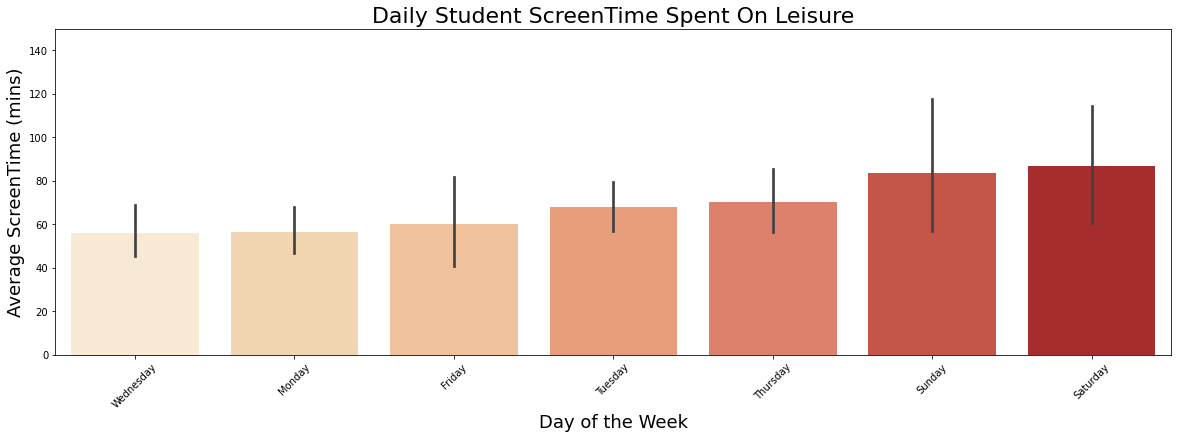

In [29]:
plt.figure(figsize=(20,6))

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1

result_leisure = devices_leisure_df.groupby(["DayOfWeek"])['DurationMins'].aggregate(np.mean).reset_index().sort_values('DurationMins')
ax = sns.barplot(x='DayOfWeek', y='DurationMins', data=devices_leisure_df, order=result_leisure['DayOfWeek'], 
                 alpha=0.9, palette='OrRd')

plt.xticks(rotation=45)
plt.ylabel('Average ScreenTime (mins)', fontsize=18)
plt.xlabel('Day of the Week', fontsize=18)
ax.set(ylim=(0, 150))
plt.title('Daily Student ScreenTime Spent On Leisure', fontsize=22)

plt.savefig('leisure.png', 
            format='png',
            dpi=100,
            bbox_inches='tight',
           transparent=True)

plt.show()



As we see from the generated plot, there is indeed more leisurely screentime usage on the weekends. It is highly possible that this is due to the previously explained theory. We also note that there is not much difference in terms of the highest and lowest average screentimes. In particular, there is approximately only a 20-22 minute difference between Wednesday's screentime and Saturday's screentime, meaning that screentime is somewhat evenly distributed throughout the week.

In [30]:
average = devices_leisure_df['DurationMins'].mean()
print('The average daily time students spent using devices for leisure was approximately: ' + str((round(average/60, 2))) + ' hours')

The average daily time students spent using devices for leisure was approximately: 1.09 hours




### How much time is spent daily using devices for studying/work purposes?

This was implemented using the same logic as the previous question. I included the activity codes for coursework (CW982), education / lectures (EL642) and paid work (PW101) to caputre the scope of the question as best as possible. 

The distribution may either be really skewed or fairly even. I do expect the overall average screentimes to be a bit higher considering the sample consists solely of students. For example, in the case of online lectures or even rewatching lecture recordings, this would cause one's screentime to increase.

In [31]:
devices_work_df = df_cleaning[(df_cleaning['PrimaryActivityCode'] =='CW982') & (df_cleaning['SecondaryActivityCode'] =='UD415') |
                                (df_cleaning['SecondaryActivityCode'] =='UD415') & (df_cleaning['PrimaryActivityCode'] =='EL642') |
                                 (df_cleaning['SecondaryActivityCode'] =='CW982') & (df_cleaning['PrimaryActivityCode'] =='UD415') |
                                 (df_cleaning['SecondaryActivityCode'] =='EL642') & (df_cleaning['PrimaryActivityCode'] =='UD415') |
                                 (df_cleaning['PrimaryActivityCode'] =='PW101') & (df_cleaning['SecondaryActivityCode'] =='UD415') |
                                (df_cleaning['PrimaryActivityCode'] =='UD415') & (df_cleaning['SecondaryActivityCode'] =='PW101')] 
devices_work_df

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
28,EL642,UD415,Watched online lectures,17/02/2022,20.0,Thursday,01:00,02:00,60.0,0.0
31,CW982,UD415,Assignments,17/02/2022,20.0,Thursday,12:30,15:00,150.0,0.0
34,EL642,UD415,Watched online lectures,17/02/2022,20.0,Thursday,17:00,19:15,135.0,1.0
180,PW101,UD415,job,20/02/2022,20.0,Sunday,02:00,04:30,150.0,-1.0
223,CW982,UD415,Bayesian Machine Learning,24/02/2022,21.0,Thursday,10:15,12:15,120.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3117,PW101,UD415,NaN,21/02/2022,21.0,Monday,16:30,17:45,75.0,1.0
3241,CW982,UD415,Coursework,21/02/2022,21.0,Monday,16:00,17:00,60.0,1.0
3277,CW982,UD415,Coursework,23/02/2022,21.0,Wednesday,11:15,13:00,105.0,1.0
3329,EL642,UD415,Research Project Preparation lecture,21/02/2022,21.0,Monday,09:15,10:00,45.0,-1.0


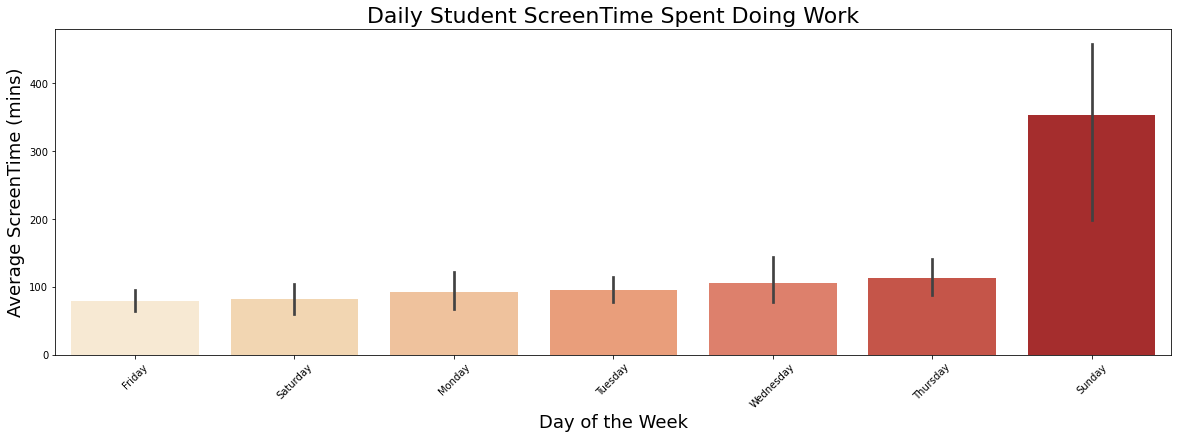

In [32]:
plt.figure(figsize=(20,6))


# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1

result_work = devices_work_df.groupby(["DayOfWeek"])['DurationMins'].aggregate(np.mean).reset_index().sort_values('DurationMins')
ax = sns.barplot(x='DayOfWeek', y='DurationMins', data=devices_work_df, order=result_work['DayOfWeek'], 
                 alpha=0.9, palette='OrRd')

plt.xticks(rotation=45)
plt.ylabel('Average ScreenTime (mins)', fontsize=18)
plt.xlabel('Day of the Week', fontsize=18)


plt.title('Daily Student ScreenTime Spent Doing Work', fontsize=22)

plt.savefig('work.png', 
            format='png',
            dpi=100,
            bbox_inches='tight',
           transparent=True)

plt.show()





As we see from the generated plot, there is a considerable difference between Sunday's average screentime and the rest of the week. More specificially, Sunday's screentime exceeds the rest of the week's average by approximately three times. Interestingly, we can see that Friday and Saturday have the least screentime and intuitively, this makes sense. Students may prioritise these two days, rather than Sunday, to reduce their work screentime and spend time doing something else. We can also conclude that the average screentime doing work is notably higher than that of the leisurely screentime; for example, in terms of work screentime, Friday (the lowest daily average) is approximately 80 minutes whereas looking at Saturday in terms of leisurely screentime (the highest daily average), we observe the same approximation of around 80 minutes!

In [33]:
average = devices_work_df['DurationMins'].mean()
print('The average daily time students spent using devices for work/study was approximately: ' + str((round(average/60, 2))) + ' hours')

The average daily time students spent using devices for work/study was approximately: 1.78 hours


### What activities do students enjoy the most/least?

This was pretty simple to implement. In essence, we are using the enjoyment score column and the respective activity codes to average which activities students enjoy or dislike.

Intuitively, I am inclined to believe that the more 'relaxing' activities, such as sleeping and leisure based pastimes, will be more positively received as compared to more 'taxing' activities such as paid work.

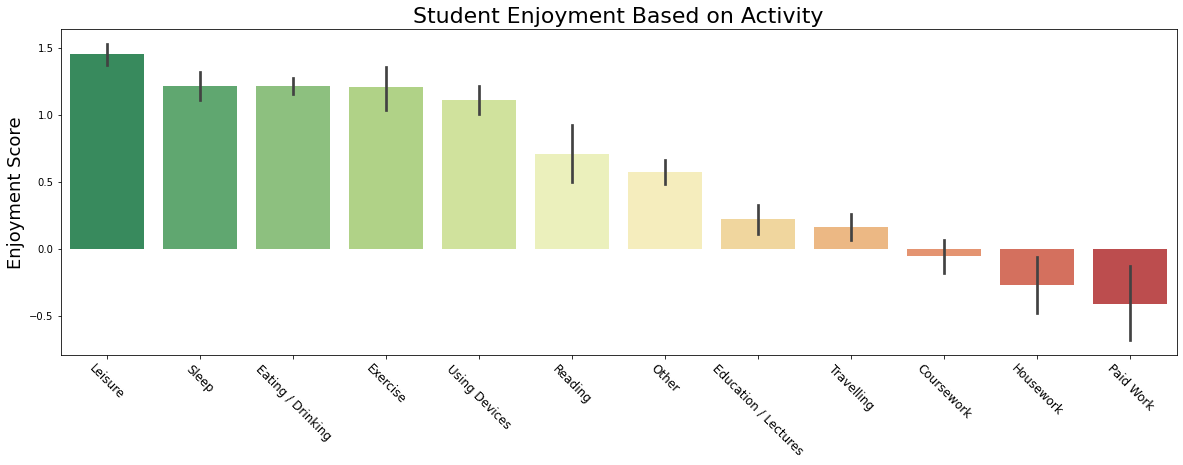

In [34]:
plt.figure(figsize=(20,6))

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1

result = df_cleaning.groupby(["PrimaryActivityCode"])['EnjoymentScore'].aggregate(np.mean).reset_index().sort_values('EnjoymentScore', ascending = False)
ax = sns.barplot(x='PrimaryActivityCode', y='EnjoymentScore', data=df_cleaning, order=result['PrimaryActivityCode'], alpha=0.9, palette='RdYlGn_r')

code_labels = [label.get_text()  for label in ax.get_xticklabels()]
code_description_dict = {'ED145':'Eating / Drinking', 'EL642':'Education / Lectures', 'X893':'Exercise',
                         'H179':'Housework', 'L418':'Leisure', 'R523':'Reading', 'S801':'Sleep', 
                         'T695':'Travelling', 'UD415':'Using Devices', 'PW101':'Paid Work', 'CW982':'Coursework', 
                         'O733':'Other'}
description_labels = [code_description_dict[label] for label in code_labels]

plt.xticks(rotation=-45)
ax.set_xticklabels(description_labels,fontsize=12)
plt.xlabel('')
plt.ylabel('Enjoyment Score', fontsize=18)
#ax.set(ylim=(-2, 2))
plt.title('Student Enjoyment Based on Activity', fontsize=22)

plt.savefig('enjoyment.png', 
            format='png',
            dpi=100,
            bbox_inches='tight',
           transparent=True)

plt.show()

As expected, leisure and sleep seem to be the two activities students enjoy the most. We note that there is not much difference between the sentiments of sleep, eating/drinking, exercise and using devices. Coursework is suprisingly not that negatively perceived but it does not seem to be that enjoyed either way. Housework and paid work appear to be the activities students dislike the most.

### Which activities do students engage in the most/least?

This format follows the previous question, the only difference being that we are considering the duration in minutes of each activity rather than the enjoyment score.

We consider the fact that an average person sleeps (give or take) 8 hours every night; this alone should put the sleep catergory at an advantage but this assumption may not be true, especially for students. Education/lectures and coursework should be higher up in the average estimates.


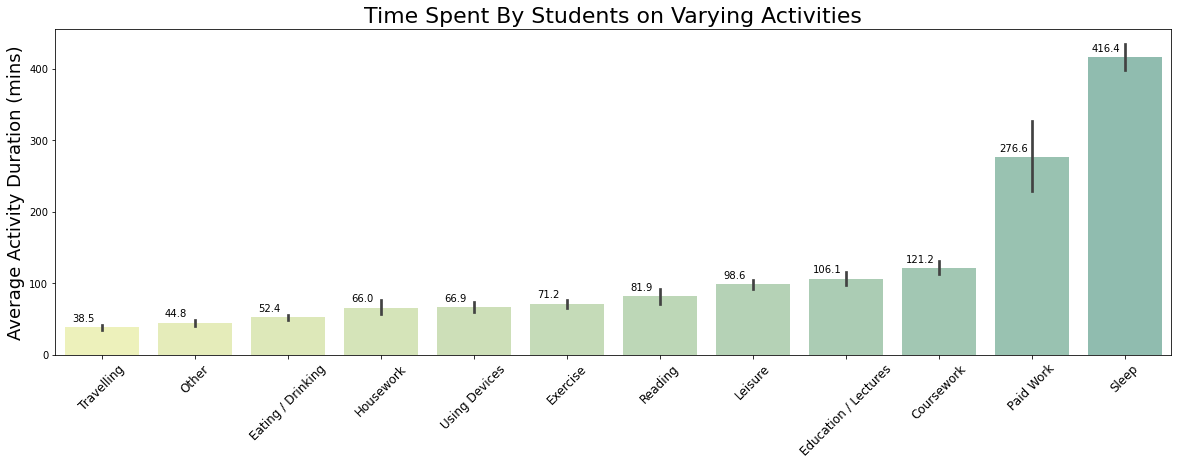

In [35]:
plt.figure(figsize=(20,6))
# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
result_duration = df_cleaning.groupby(["PrimaryActivityCode"])['DurationMins'].aggregate(np.mean).reset_index().sort_values('DurationMins')
ax = sns.barplot(x='PrimaryActivityCode', y='DurationMins', data=df_cleaning, order=result_duration['PrimaryActivityCode'], alpha=0.5, palette="summer_r")


# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + (1.5*p.get_width()) / 6., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
    
code_labels = [label.get_text()  for label in ax.get_xticklabels()]
code_description_dict = {'ED145':'Eating / Drinking', 'EL642':'Education / Lectures', 'X893':'Exercise', 'H179':'Housework', 'L418':'Leisure', 'R523':'Reading', 'S801':'Sleep', 'T695':'Travelling', 'UD415':'Using Devices', 'PW101':'Paid Work', 'CW982':'Coursework', 'O733':'Other'}
description_labels = [code_description_dict[label] for label in code_labels]
plt.xticks(rotation=45)
ax.set_xticklabels(description_labels,fontsize=12)
plt.xlabel('')
plt.ylabel('Average Activity Duration (mins)', fontsize=18)
plt.title('Time Spent By Students on Varying Activities', fontsize=22)


plt.savefig('time.png', 
            format='png',
            dpi=100,
            bbox_inches='tight',
           transparent=True)

plt.show()

#palette = sns.choose_cubehelix_palette();



As expected, sleep seems to be the winner in terms of student engagement. Interestingly, paid work is the second most engaged activity, inferring that a substantial amount of students are working alongside studying. In fact, students are spending more than twice as much time doing paid work than they are engaging in coursework and education/lectures.

## American Time Use Survey (ATUS) Dataset

In order to compare the above analysis to a publicly available dataset, I decided to use the American Time Use Survey (ATUS) Activity File, which is available to download at https://www.bls.gov/tus/datafiles_0315.htm or directly from the following link: https://www.bls.gov/tus/special.requests/atusact_0315.zip. 
As per the respective website, "the Activity file contains information about how ATUS respondents spent their diary day. It includes information such as activity codes, activity start and stop times, and locations," therefore making this a particularly useful dataset for comparison. Another useful resource is also available via the first link or directly from: https://www.bls.gov/tus/lexiconnoex0315.pdf. This is a pdf containing the respective activity codes, as well as where they are applicable.

In [36]:
# unzip atusact_0315 zip and place folder into this directory before running!


public_data = pd.read_csv('atusact_0315.dat', sep=',')
public_data.head()

,TUCASEID,TUACTIVITY_N,TUACTDUR24,TUCC5,TUCC5B,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TUSTARTTIM,TUSTOPTIME,...,TRTONHH_LN,TRTOHH_LN,TRTHH_LN,TRTNOHH_LN,TEWHERE,TUCC7,TRWBELIG,TRTEC_LN,TUEC24,TUDURSTOP
0,20030100013280,1,60,-1,-1,-1,-1,-1,04:00:00,05:00:00,...,-1,-1,-1,-1,9,-1,-1,-1,-1,-1
1,20030100013280,2,30,-1,-1,-1,-1,-1,05:00:00,05:30:00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,20030100013280,3,600,-1,-1,-1,-1,-1,05:30:00,15:30:00,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,20030100013280,4,150,-1,-1,-1,-1,-1,15:30:00,18:00:00,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1
4,20030100013280,5,5,-1,-1,-1,-1,-1,18:00:00,18:05:00,...,-1,-1,-1,-1,1,-1,-1,-1,-1,-1


In [37]:
# theres a whole lot of columns we dont need to so just choose the relevant ones!

public_data = public_data[['TRCODEP','TUACTDUR']].copy()
public_data.head()

# TRCODEP is the activity code and TUACTDUR is the duration 

,TRCODEP,TUACTDUR
0,130124,60
1,10201,30
2,10101,600
3,120303,150
4,110101,5


In [38]:
ActivityDesc_Public = list()

for activity_code in public_data['TRCODEP'].values:    # for each activity code in the public activity codes

    act_code = activity_code.astype(str)
    
    # the activity codes are usually 6 digits in length but as you can see from the above output, some of them
    # are missing zeroes so we compensate by filling them in 
    
    if len(act_code) != 6:
        act_code = str(0) + act_code
        
    # matching activity codes to respective descriptions
    
    if act_code[:2] == '11':       act_desc = 'Eating / Drinking'
    
    elif act_code[:2] == '06':     
        act_desc = 'Education / Lectures' # both start with 06 
        if act_code[:4] == '0603':  
            act_desc = 'Coursework'
    
    elif act_code[:2] == '13':     act_desc = 'Exercise'
    elif act_code[:2] == '02':     act_desc = 'Housework'
    
    elif act_code[:2] == '12':       
        act_desc = 'Leisure'
        if act_code[:6] == '120312':     # both start with 12 
            act_desc = 'Reading'
    
    elif act_code[:4] == '0101':     act_desc = 'Sleep'
    elif act_code[:2] == '18':       act_desc = 'Travelling'
    elif act_code[:2] == '16':       act_desc = 'Using Devices'
    elif act_code[:2] == '05':       act_desc = 'Paid Work'
    else:                            act_desc = 'Other'
    
    ActivityDesc_Public.append(act_desc)

public_data["ActivityDescription"] = np.asarray(ActivityDesc_Public)

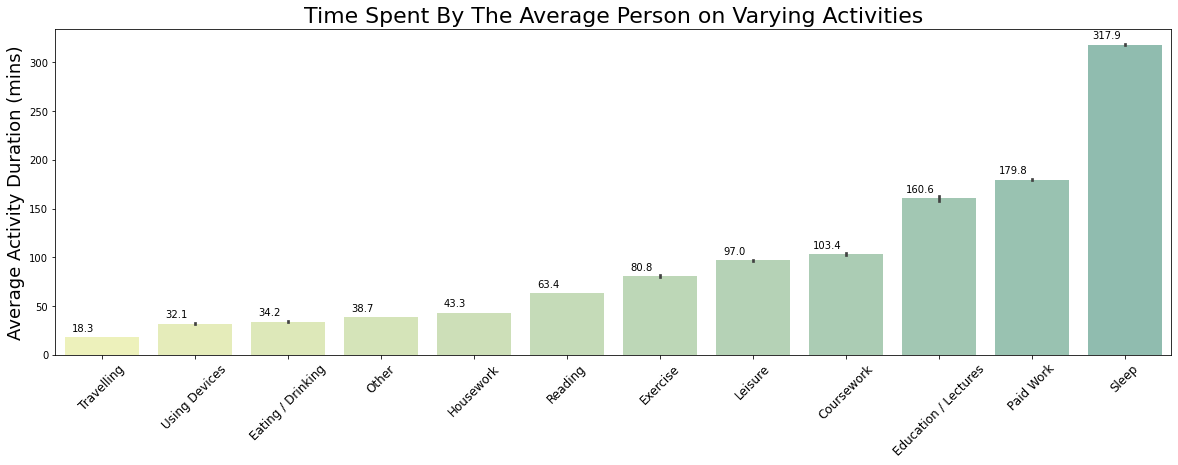

In [39]:
plt.figure(figsize=(20,6))    # same plot as previous one except we are using ActivityDescription that we just
                               # derived and TUACTDUR which is our duration

# https://gist.github.com/fomightez/bb5a9c727d93d1508187677b4d74d7c1
result_public = public_data.groupby(["ActivityDescription"])['TUACTDUR'].aggregate(np.mean).reset_index().sort_values('TUACTDUR')
ax = sns.barplot(x='ActivityDescription', y='TUACTDUR', data=public_data, order=result_public['ActivityDescription'], 
                 alpha=0.5, palette="summer_r")

# https://datavizpyr.com/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + (1.5*p.get_width()) / 6., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45,fontsize=12)
plt.xlabel('')
plt.ylabel('Average Activity Duration (mins)', fontsize=18)
plt.title('Time Spent By The Average Person on Varying Activities', fontsize=22)


plt.savefig('public_data.png', 
            format='png',
            dpi=100,
            bbox_inches='tight',
           transparent=True)


plt.show()

We can see that sleep still seems to be the activity people do the most. We note the relative difference in the average duration of this activity, which is around 317.9 minutes versus 416.4 minutes which was seen in our analysis. This disparity could be due to the fact that the ATUS dataset was significantly larger than our dataset, hence allowing for more variance or in the case of there being a bigger sample, a more accurate representation of the average estimates. Paid work, education/lectures and coursework still appear at the upper end of the average estimates, however we see device usage drop to the lower end of the distribution tail. When we consider the fact that the ATUS dataset contains data from since 2003, this is not surprising since certain technological aspects, such as mobile phones, laptops, etc., would not have been as prominent during that era. 